**Initialization**

In [1]:
import numpy as np

%tensorflow_version 2.x
import tensorflow as tf

import matplotlib.pyplot as plt

**Task 1: Data set**

The Cifar10 dataset comes directly in a two-part dataset for training and test data. The training dataset contains 50000 image-label pairs and the test dataset 10000 image-label pairs. The labels are displayed as numbers from 0 to 9. Among other things in the following code snippet these numbers are mapped to their string label class names. The images in the datasets come up with a fixed shape of 32 x 32 x 3. Thus no resizing is necessary. 

Additionally, some example images of the dataset are displayed with the corresponding string label class name.

170500096/170498071 [==============================] - 2s 0us/step
Training inputs shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test inputs shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


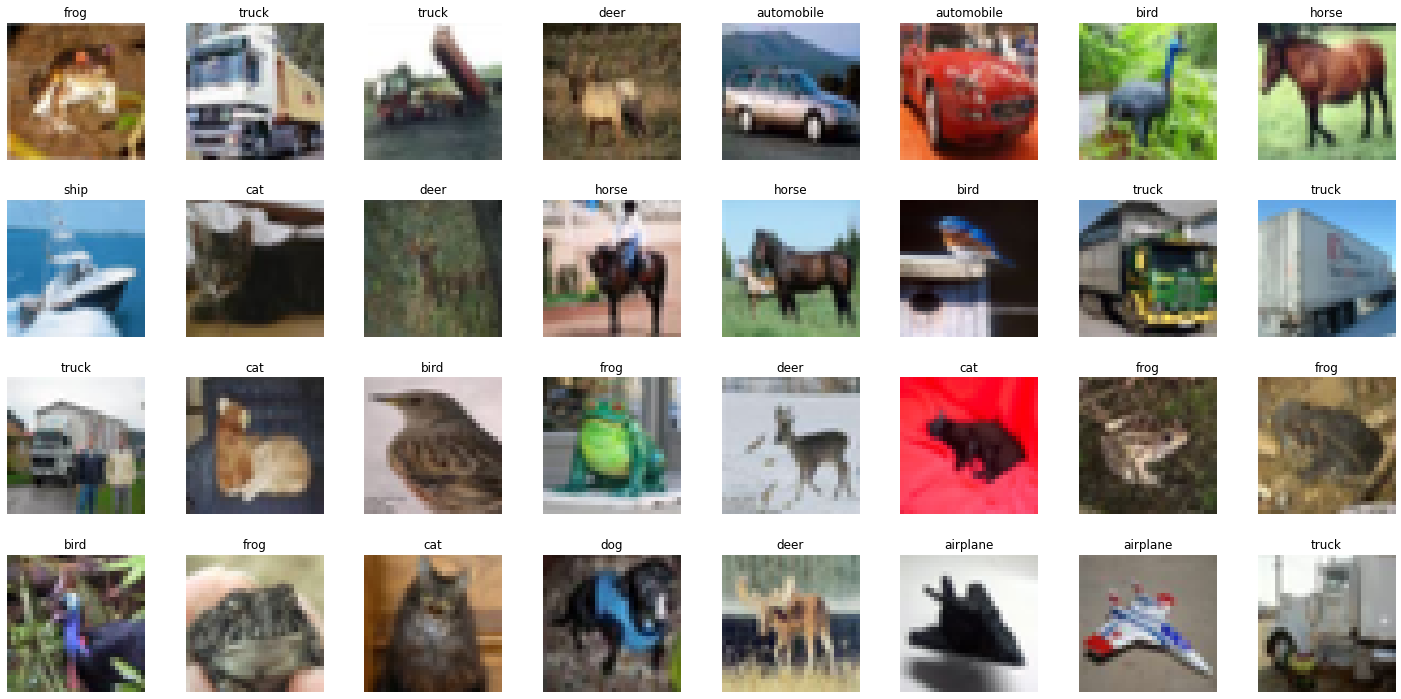

In [2]:
(training_inputs, training_labels), (test_inputs, test_labels) = tf.keras.datasets.cifar10.load_data()

print("Training inputs shape: " + str(training_inputs.shape))
print("Training labels shape: " + str(training_labels.shape))
print("Test inputs shape: " + str(test_inputs.shape))
print("Test labels shape: " + str(test_labels.shape))

label_encoding = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
fig, ax = plt.subplots(4, 8, figsize=(20,10))
fig.tight_layout()
ax = ax.flatten()
for i in range(32):
  image = training_inputs[i]
  label = label_encoding[training_labels[i][-1]]

  ax[i].imshow(image)
  ax[i].set_title(label)
  ax[i].axis("off")

Input pipeline.

In [3]:
batch_size = 64

# Creates tensorflow datasets for the training and test data.
training_dataset = tf.data.Dataset.from_tensor_slices((training_inputs, training_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_inputs, test_labels))

# Conducts the normalization of the inputs (images) and the one-hot-encoding of the targets.
training_dataset = training_dataset.map(lambda inp, tar: ((2*(inp/255)-1), tf.one_hot(tf.squeeze(tar), 10)))  # tf.squeeze(tar) to remove dimensions of size 1 from the shape of the target-tensors.
test_dataset = test_dataset.map(lambda inp, tar: ((2*(inp/255)-1), tf.one_hot(tf.squeeze(tar), 10)))     
                                                                                          
# Batches, shuffles and prefetches the training- and test datasets.
training_dataset = training_dataset.batch(batch_size).shuffle(buffer_size = batch_size).prefetch(128)
test_dataset = test_dataset.batch(batch_size).shuffle(buffer_size = batch_size).prefetch(128)

**Task 2: Model**

The model is created as a CNN with 6 convolutional layers and the corresponding pooling layers. Additionally, several regularization methods are implemented:

*   Initialize the weigths with a Glorot normal distribution (1) and the biases with zero (2) to avoid vanshinig/ exploding gradients.
*   Apply regularization loss L2 to the kernel weights matrix (3) to reduce overfitting. (3) is also referenced in the computing of the loss in the training step.
*   Apply batch normalization (4) to normalize the drives and achieve a more stable and faster network.
*   To get a more general image classifier some dropout layers (5) are provided.

In [4]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Layer

# Description: The class Model describes a convolutional neural network with a feature extractor and a classifier.
class Model(Model): 
  
  def __init__(self):
    super(Model, self).__init__()
    
    # Feature extractor
    self.conv_1 = tf.keras.layers.Conv2D(filters = 90,
                                         kernel_size = 3,
                                         activation = None,
                                         padding = 'same',
                                         kernel_initializer = tf.keras.initializers.glorot_normal,   # (1)
                                         bias_initializer = 'zeros',                                 # (2)
                                         kernel_regularizer = tf.keras.regularizers.L2(0.01),        # (3)
                                         input_shape = (32, 32, 3))
    self.batch_norm_1 = tf.keras.layers.BatchNormalization()                                         # (4)
    self.activ_1 = tf.keras.activations.relu                         
    self.max_pool_1 = tf.keras.layers.MaxPool2D(padding = 'same') 
    self.dropout_1 = tf.keras.layers.Dropout(rate = 0.3)                                             # (5)
    self.conv_2 = tf.keras.layers.Conv2D(filters = 110,
                                         kernel_size = 3,
                                         activation = None,
                                         padding = 'same',
                                         kernel_initializer = tf.keras.initializers.glorot_normal,   # (1)
                                         bias_initializer = 'zeros',                                 # (2)
                                         kernel_regularizer = tf.keras.regularizers.L2(0.01))        # (3)
    self.batch_norm_2 = tf.keras.layers.BatchNormalization()                                         # (4)
    self.activ_2 = tf.keras.activations.relu
    self.max_pool_2 = tf.keras.layers.MaxPool2D(padding = 'same')
    self.conv_3 = tf.keras.layers.Conv2D(filters = 120,
                                         kernel_size = 3,
                                         activation = None,
                                         padding = 'same',
                                         kernel_initializer = tf.keras.initializers.glorot_normal,   # (1)
                                         bias_initializer = 'zeros',                                 # (2)
                                         kernel_regularizer = tf.keras.regularizers.L2(0.01))        # (3)
    self.batch_norm_3 = tf.keras.layers.BatchNormalization()                                         # (4)
    self.activ_3 = tf.keras.activations.relu
    self.max_pool_3 = tf.keras.layers.MaxPool2D(padding = 'same')
    self.dropout_3 = tf.keras.layers.Dropout(rate = 0.4)                                             # (5)
    self.conv_4 = tf.keras.layers.Conv2D(filters = 120,
                                         kernel_size = 3,
                                         activation = None,
                                         padding = 'same',
                                         kernel_initializer = tf.keras.initializers.glorot_normal,   # (1)
                                         bias_initializer = 'zeros',                                 # (2)
                                         kernel_regularizer = tf.keras.regularizers.L2(0.01))        # (3)
    self.batch_norm_4 = tf.keras.layers.BatchNormalization()                                         # (4)
    self.activ_4 = tf.keras.activations.relu
    self.max_pool_4 = tf.keras.layers.MaxPool2D(padding = 'same')
    self.conv_5 = tf.keras.layers.Conv2D(filters = 110,
                                         kernel_size = 3,
                                         activation = None,
                                         padding = 'same',
                                         kernel_initializer = tf.keras.initializers.glorot_normal,   # (1)
                                         bias_initializer = 'zeros',                                 # (2)
                                         kernel_regularizer = tf.keras.regularizers.L2(0.01))        # (3)
    self.batch_norm_5 = tf.keras.layers.BatchNormalization()                                         # (4)
    self.activ_5 = tf.keras.activations.relu      
    self.max_pool_5 = tf.keras.layers.MaxPool2D(padding = 'same')
    self.dropout_5 = tf.keras.layers.Dropout(rate = 0.3)                                             # (5)
    self.conv_6 = tf.keras.layers.Conv2D(filters = 90,
                                         kernel_size = 3,
                                         activation = None,
                                         padding = 'same',
                                         kernel_initializer = tf.keras.initializers.glorot_normal,   # (1)
                                         bias_initializer = 'zeros',                                 # (2)
                                         kernel_regularizer = tf.keras.regularizers.L2(0.01))        # (3)
    self.batch_norm_6 = tf.keras.layers.BatchNormalization()                                         # (4)
    self.activ_6 = tf.keras.activations.relu
    self.max_pool_6 = tf.keras.layers.MaxPool2D(padding = 'same')

    # Classifier
    self.global_pool = tf.keras.layers.GlobalAveragePooling2D()    
    self.dropout_7 = tf.keras.layers.Dropout(rate = 0.5)                                             # (5)
    self.output_layer = tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)


  # Description: This function conducts one forward-step of the model. 
  #              The python decorator @tf.function is used to bundle multiple computations into one computational graph.
  #              @parameters: (input) x, training (to differ between training and test calls of the CNN)
  #              @returns: (prediction) x
  @tf.function
  def call(self, x, training = True):
      x = self.conv_1(x)
      x = self.batch_norm_1(x, training)
      x = self.activ_1(x)
      x = self.max_pool_1(x)
      x = self.dropout_1(x, training)
      x = self.conv_2(x)
      x = self.batch_norm_2(x, training)
      x = self.activ_2(x)
      x = self.max_pool_2(x)
      x = self.conv_3(x)
      x = self.batch_norm_3(x, training)
      x = self.activ_3(x)
      x = self.max_pool_3(x)
      x = self.dropout_3(x, training)
      x = self.conv_4(x)
      x = self.batch_norm_4(x, training)
      x = self.activ_4(x)
      x = self.max_pool_4(x)
      x = self.conv_5(x)
      x = self.batch_norm_5(x, training)
      x = self.activ_5(x)
      x = self.max_pool_5(x)
      x = self.dropout_5(x, training)
      x = self.conv_6(x)
      x = self.batch_norm_6(x, training)
      x = self.activ_6(x)
      x = self.max_pool_6(x)    

      x = self.global_pool(x)
      x = self.dropout_7(x, training)
      x = self.output_layer(x)
      return x

**Task 3: Training**

In [6]:
# Description: This function trains an object of the class Model. It conducts a forward-step and the backpropagation 
#              throughout the network. Additionally, it determines the average training loss and accuracy.
#              @parameters: model, training_data, loss_fn, optimizer, training (to differ between training and test calls of the CNN)
#              @returns: training_loss, training_accuracy
def training_step(model, training_data, loss_fn, optimizer, training = True):
  training_losses = []
  training_accuracies = []

  for (input, target) in training_data:
    with tf.GradientTape() as tape:
      prediction = model(input, training)
      current_training_loss = loss_fn(target, prediction) + tf.math.reduce_sum(model.losses)   # (3)
      gradients = tape.gradient(current_training_loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    training_losses.append(current_training_loss.numpy())

    current_training_accuracy = np.argmax(target, axis=1) == np.argmax(prediction, axis=1)
    training_accuracies.append(np.mean(current_training_accuracy))  
  
  training_loss = np.mean(training_losses)
  training_accuracy = np.mean(training_accuracies)
  return training_loss, training_accuracy


# Description: This function determines the average test loss and accuracy of an object of the class Model.
#              @parameters: model, test_data, loss_fn, training (to differ between training and test calls of the CNN)
#              @returns: test_loss, test_accuracy
def test(model, test_data, loss_fn, training = False):
  test_losses = []
  test_accuracies = []

  for (input, target) in test_data:
    prediction = model(input, training)
    
    current_test_loss = loss_fn(target, prediction)
    test_losses.append(current_test_loss.numpy())

    current_test_accuracy = np.argmax(target, axis=1) == np.argmax(prediction, axis=1)
    test_accuracies.append(np.mean(current_test_accuracy))   
    
  test_loss = np.mean(test_losses)
  test_accuracy = np.mean(test_accuracies)
  return test_loss, test_accuracy

Epoch 0
Training accuracy: 0.20476342710997442
Test accuracy: 0.2132762738853503
Epoch 1
Training accuracy: 0.31767503196930946
Test accuracy: 0.36574442675159236
Epoch 2
Training accuracy: 0.3867886828644501
Test accuracy: 0.3943073248407643
Epoch 3
Training accuracy: 0.4405770460358056
Test accuracy: 0.39759156050955413
Epoch 4
Training accuracy: 0.4986413043478261
Test accuracy: 0.5032842356687898


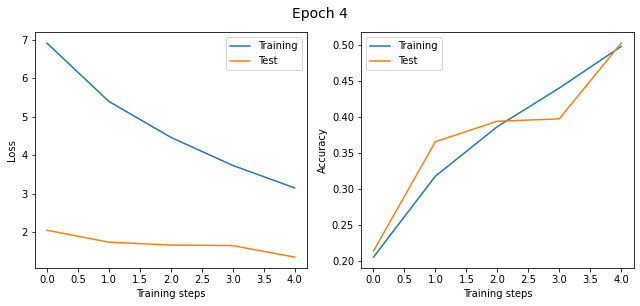

Epoch 5
Training accuracy: 0.5387028452685422
Test accuracy: 0.4638734076433121
Epoch 6
Training accuracy: 0.5717111572890026
Test accuracy: 0.5713574840764332


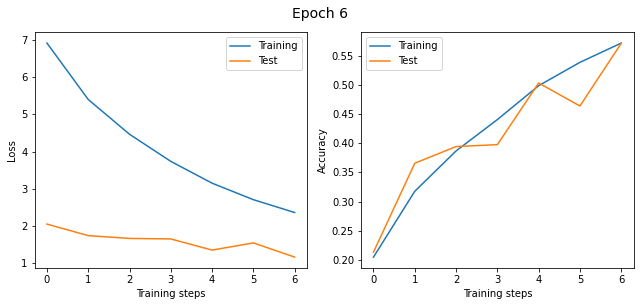

Epoch 7
Training accuracy: 0.5985653772378516
Test accuracy: 0.6124601910828026


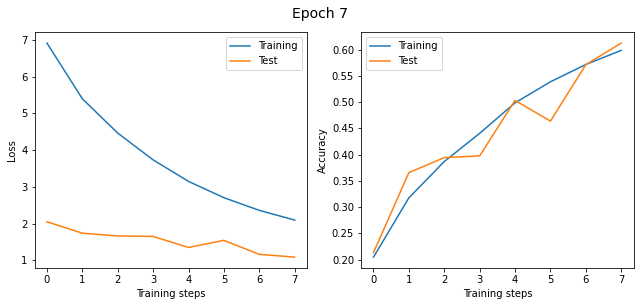

Epoch 8
Training accuracy: 0.6222826086956522
Test accuracy: 0.6402269108280255
Epoch 9
Training accuracy: 0.6446811061381074
Test accuracy: 0.6604299363057324


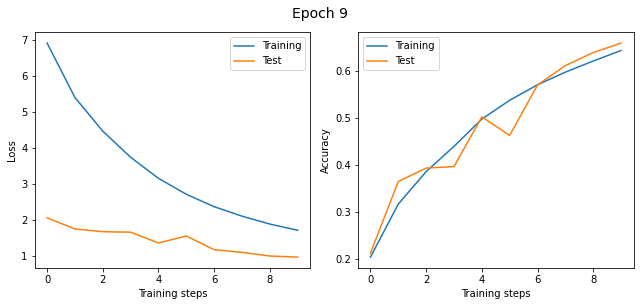

Epoch 10
Training accuracy: 0.663942615089514
Test accuracy: 0.6692874203821656
Epoch 11
Training accuracy: 0.6797074808184144
Test accuracy: 0.7246218152866242


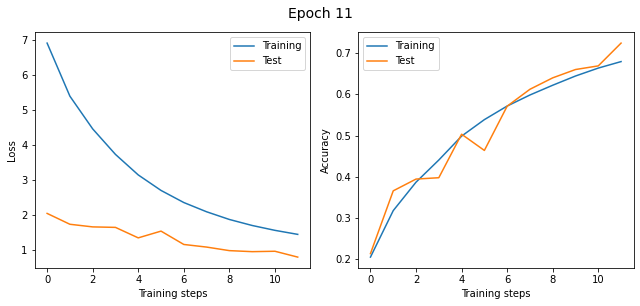

Epoch 12
Training accuracy: 0.6978500639386189
Test accuracy: 0.6757563694267515
Epoch 13
Training accuracy: 0.7052829283887468
Test accuracy: 0.7142714968152867
Epoch 14
Training accuracy: 0.723025895140665
Test accuracy: 0.7277070063694268
Epoch 15
Training accuracy: 0.7262827685421995
Test accuracy: 0.7333797770700637
Epoch 16
Training accuracy: 0.7359135230179028
Test accuracy: 0.7208399681528662
Epoch 17
Training accuracy: 0.7463235294117647
Test accuracy: 0.7621417197452229


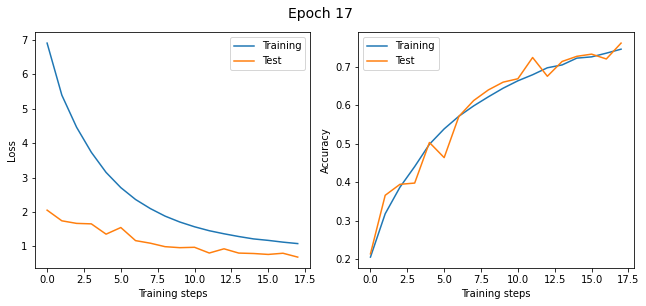

Epoch 18
Training accuracy: 0.754215952685422
Test accuracy: 0.7605493630573248
Epoch 19
Training accuracy: 0.7586516943734015
Test accuracy: 0.7719944267515924
Epoch 20
Training accuracy: 0.7640664961636828
Test accuracy: 0.7501990445859873
Epoch 21
Training accuracy: 0.7705402813299232
Test accuracy: 0.76671974522293
Epoch 22
Training accuracy: 0.7768742007672634
Test accuracy: 0.7937898089171974
Epoch 23
Training accuracy: 0.7812300191815856
Test accuracy: 0.7800557324840764
Epoch 24
Training accuracy: 0.7856257992327366
Test accuracy: 0.7996616242038217
Epoch 25
Training accuracy: 0.7916200447570333
Test accuracy: 0.8013535031847133


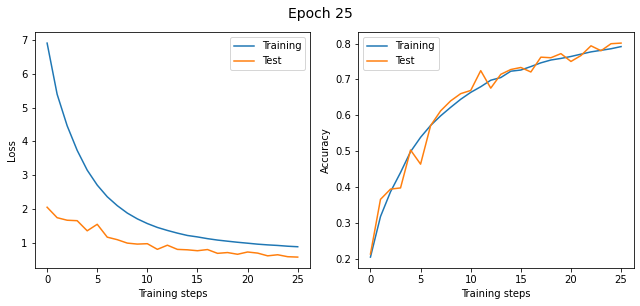

Epoch 26
Training accuracy: 0.7940776854219949
Test accuracy: 0.7947850318471338
Epoch 27
Training accuracy: 0.7970148657289002
Test accuracy: 0.7615445859872612
Epoch 28
Training accuracy: 0.8009311061381074
Test accuracy: 0.7891122611464968
Epoch 29
Training accuracy: 0.8018702046035806
Test accuracy: 0.7961783439490446
Epoch 30
Training accuracy: 0.8090832800511509
Test accuracy: 0.8048367834394905
Epoch 31
Training accuracy: 0.8096427429667519
Test accuracy: 0.8085191082802548
Epoch 32
Training accuracy: 0.811940537084399
Test accuracy: 0.7881170382165605
Epoch 33
Training accuracy: 0.8115009590792839
Test accuracy: 0.7818471337579618
Epoch 34
Training accuracy: 0.8167359335038363
Test accuracy: 0.7876194267515924
Epoch 35
Training accuracy: 0.8199528452685422
Test accuracy: 0.8185708598726115
Epoch 36
Training accuracy: 0.8220708120204604
Test accuracy: 0.8102109872611465
Epoch 37
Training accuracy: 0.8215113491048593
Test accuracy: 0.7955812101910829
Epoch 38
Training accuracy: 0

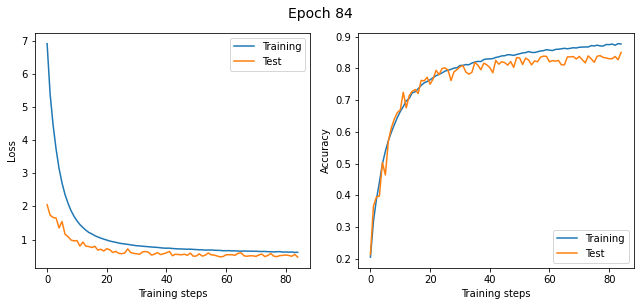

Epoch 85
Training accuracy: 0.8766384271099744
Test accuracy: 0.8414609872611465
Epoch 86
Training accuracy: 0.8789362212276215
Test accuracy: 0.8360867834394905
Epoch 87
Training accuracy: 0.880954283887468
Test accuracy: 0.82703025477707
Epoch 88
Training accuracy: 0.8810941496163683
Test accuracy: 0.8369824840764332
Epoch 89
Training accuracy: 0.8801750319693095
Test accuracy: 0.8441480891719745
Epoch 90
Training accuracy: 0.8809343030690537
Test accuracy: 0.8318073248407644
Epoch 91
Training accuracy: 0.8784966432225064
Test accuracy: 0.82921974522293
Epoch 92
Training accuracy: 0.881453804347826
Test accuracy: 0.8340963375796179
Epoch 93
Training accuracy: 0.8829523657289002
Test accuracy: 0.8253383757961783
Epoch 94
Training accuracy: 0.8808144181585678
Test accuracy: 0.8489251592356688
Epoch 95
Training accuracy: 0.8838315217391305
Test accuracy: 0.8442476114649682
Epoch 96
Training accuracy: 0.884490888746803
Test accuracy: 0.8389729299363057
Epoch 97
Training accuracy: 0.88303

In [10]:
# Description: This part creates an object of the class Model called model and executes the training and testing of the model in the training and test loop. The training 
#              takes place over an amount of epochs (n_epochs) with a predefined learning rate. The loss function defines the kind of loss-calculation. The optimizer 
#              is needed to adjust the gradients in the training steps. Moreover, the data for the visualization of the training and test progress is collected.
#              In order to better monitor the training progress, the loss and accuracy graphs are provided in addtion to the numerical outputs when the test accuracy 
#              has significantly improved.
tf.keras.backend.clear_session()

model = Model()
n_epochs = 120
learning_rate = 0.000075
loss_fn = tf.keras.losses.CategoricalCrossentropy()                    # CategoricalCrossentropy because of 10 labels to differ.
optimizer = tf.keras.optimizers.Adam(learning_rate, amsgrad = True)    # Optimizer Adam (Adaptive Moment Estimation) with AMSGrad activated.

training_losses = []
training_accuracies = []
test_losses = []
test_accuracies = []

dynamic_threshold_train_visio = 0.5                                    # Test accuracy threshold from which the training progress is displayed.
# Training and test loop
for epoch in range(n_epochs):
    print('Epoch ' + str(epoch))

    training_loss, training_accuracy = training_step(model, training_dataset, loss_fn, optimizer, training = True)
    training_losses.append(training_loss)
    training_accuracies.append(training_accuracy)

    test_loss, test_accuracy = test(model, test_dataset, loss_fn, training = False)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print("Training accuracy: " + str(training_accuracy))
    print("Test accuracy: " + str(test_accuracy))

    # Visualization during training to check how the CNN is doing. In 5% steps of the test accuracy starting up from 50% test accuracy.
    if test_accuracy >= dynamic_threshold_train_visio: 
      fig, ax = plt.subplots(1,2, figsize=(9, 4))

      fig.suptitle(('Epoch ' + str(epoch)), fontsize=14, y=1.05)
      line1, = ax[0].plot(training_losses)
      line2, = ax[0].plot(test_losses)
      ax[0].set_xlabel("Training steps")
      ax[0].set_ylabel("Loss")
      ax[0].legend((line1, line2),("Training", "Test"))

      line1, = ax[1].plot(training_accuracies)
      line2, = ax[1].plot(test_accuracies)
      ax[1].set_xlabel("Training steps")
      ax[1].set_ylabel("Accuracy")
      ax[1].legend((line1, line2),("Training", "Test"))

      fig.tight_layout()
      plt.draw()
      plt.show()

      # Increases the test accuracy threshold by 5%.  
      dynamic_threshold_train_visio += 0.05

**Task 4: Visualization**

85% test accuracy is achieved after 84 epochs. In the following epochs there are only very small improvements in the training and test accuracy. 

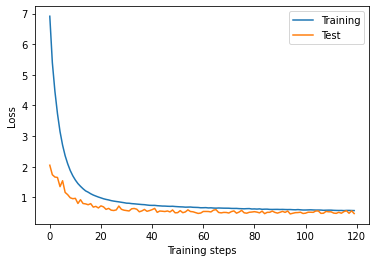

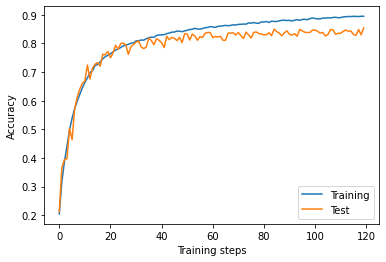

In [11]:
# Description: Figure 1 shows the loss for each epoch during the training and testing of the model.
#              Figure 2 shows the accuracy for each epoch during the training and testing of the model.
plt.figure()
line1, = plt.plot(training_losses)
line2, = plt.plot(test_losses)
plt.xlabel("Training steps")
plt.ylabel("Loss")
plt.legend((line1, line2),("Training", "Test"))
plt.show()

plt.figure()
line1, = plt.plot(training_accuracies)
line2, = plt.plot(test_accuracies)
plt.xlabel("Training steps")
plt.ylabel("Accuracy")
plt.legend((line1, line2),("Training", "Test"))
plt.show()